# SYDE 556/750 --- Assignment 4
**Student ID: 20854840**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

import scipy.integrate as integrate

seed = 3089487909

# Fix the numpy random seed for reproducible results
np.random.seed(seed)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

In [2]:
# Helper for calculating rmse
def calc_rmse(x1, x2):
    return round(np.sqrt(np.mean((x1 - x2) ** 2)), 10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(50, 1)
(50, 1)
(50, 1)
-------------------------------------
The RMSE for 100 neurons = 0.005193828
-------------------------


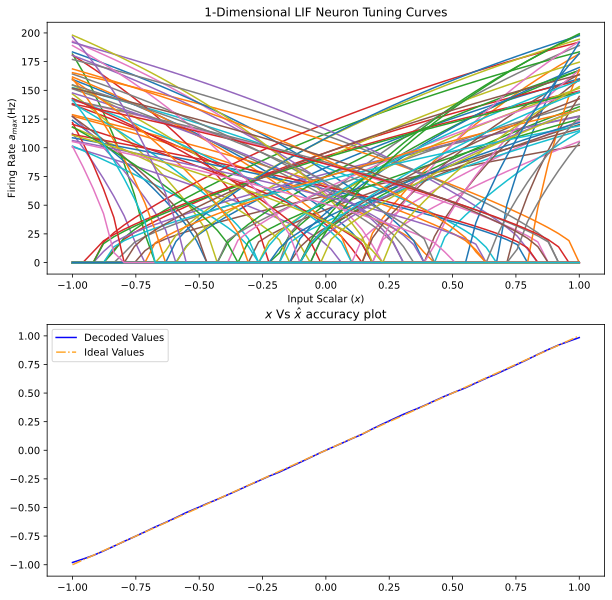

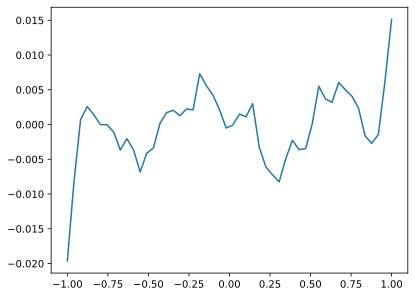

In [3]:
# Create constants for ensemble
num_neurons = 100
tau_ref, tau_rc = 0.002, 0.02
dim = 1
a_min, a_max = 100, 200
encoders = [-1,1]
# Create network of 1D Neurons for the ensmble with a seed
model = nengo.Network(label='1-Dim Ensemble', seed=seed)

# Create LIF rates with set Taus. Then create Ensemble of neurons with a dummy connection 
# to calculate decoded values 
lif = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
with model:
    ensemble = nengo.Ensemble(n_neurons=num_neurons, 
        dimensions=dim, max_rates=nengo.dists.Uniform(a_min, a_max), 
        neuron_type=lif)
    
    connection = nengo.Connection(ensemble,ensemble)

# Reference simulator to be used to go against the ensemble to form the tuning curves.  
# Simulator providing information about the built ensemble
sim = nengo.Simulator(model)
x, A = tuning_curves(ensemble,sim)
# Plot tuning curves
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.set_title("1-Dimensional LIF Neuron Tuning Curves")
ax1.plot(x,A)
ax1.set_ylabel("Firing Rate $a_{max} $(Hz)")
ax1.set_xlabel("Input Scalar ($x$)")


# Using connection and simulation, calculate the evaluation points, decoded values and target values
eval_point, ideal, decoded = eval_point_decoding(connection, sim, x)

# Plot the Decoded values vs the Target (ideal) values
ax2.set_title("$x$ Vs $\hat x$ accuracy plot")
ax2.plot(eval_point, decoded, label="Decoded Values", color="xkcd:Primary Blue")
ax2.plot(eval_point,ideal, label="Ideal Values", color="xkcd:mango", linestyle="dashdot")
ax2.legend()

error = ideal-decoded
plt.figure()

plt.plot(eval_point, error)
print(ideal.shape)
print(decoded.shape)
print(error.shape)

# Calculate RMSE
rmse_LIF = calc_rmse(ideal,decoded)
print("-------------------------------------")
print("The RMSE for 100 neurons =", str(rmse_LIF))
print("-------------------------")





**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE for 100 Neurons with Radius0.5------
0.002596914
--------------------------------------------
RMSE for 100 Neurons with Radius1------
0.005193828
--------------------------------------------
RMSE for 100 Neurons with Radius2------
0.010387656
--------------------------------------------
RMSE for 100 Neurons with Radius4------
0.0207753119
--------------------------------------------


Text(0, 0.5, 'RMSE')

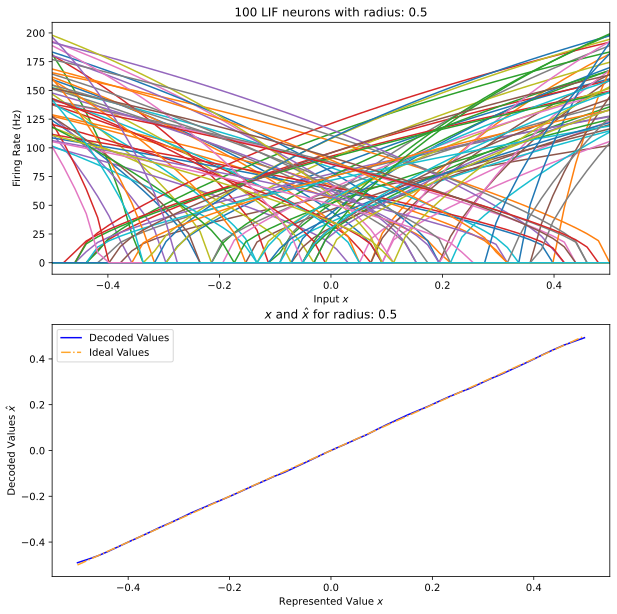

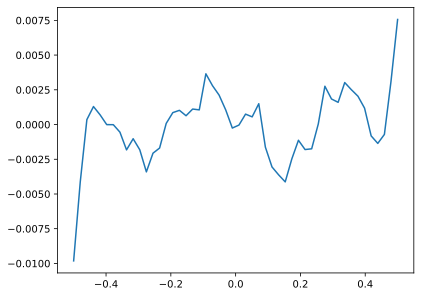

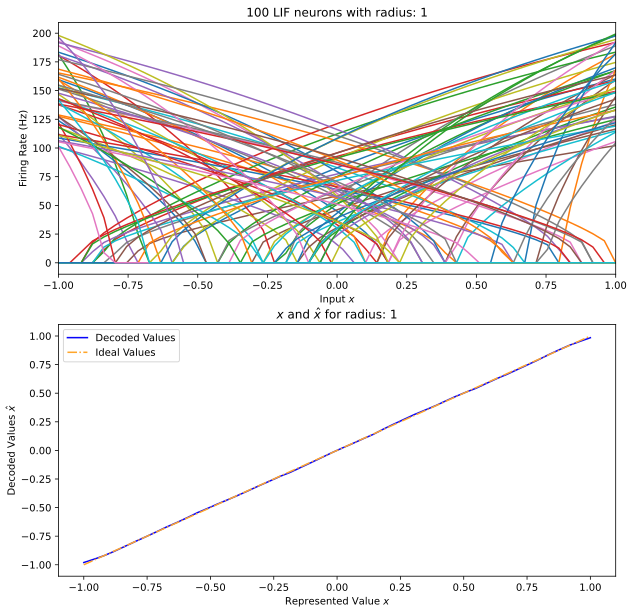

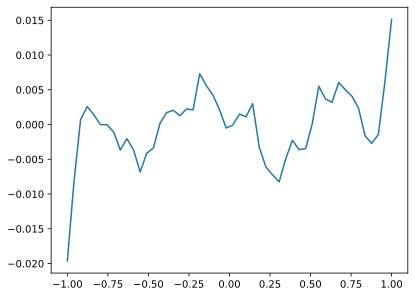

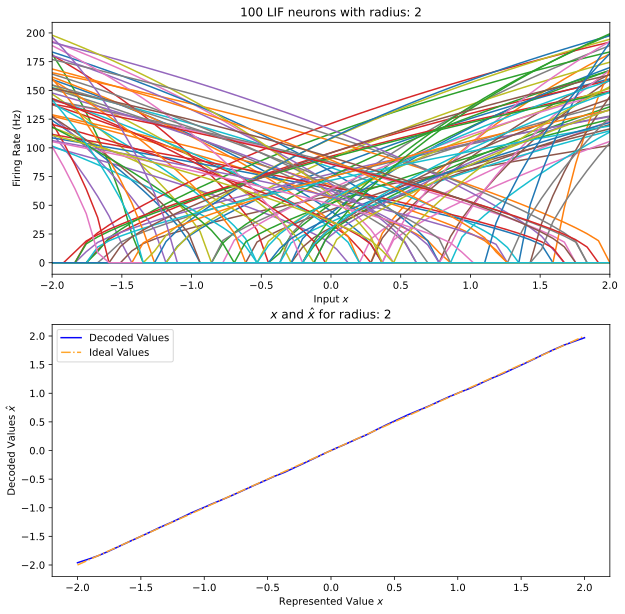

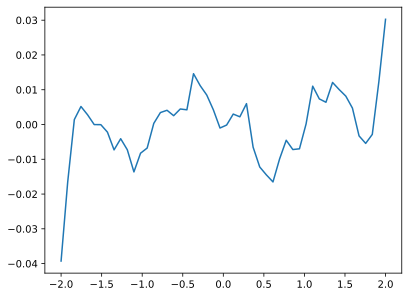

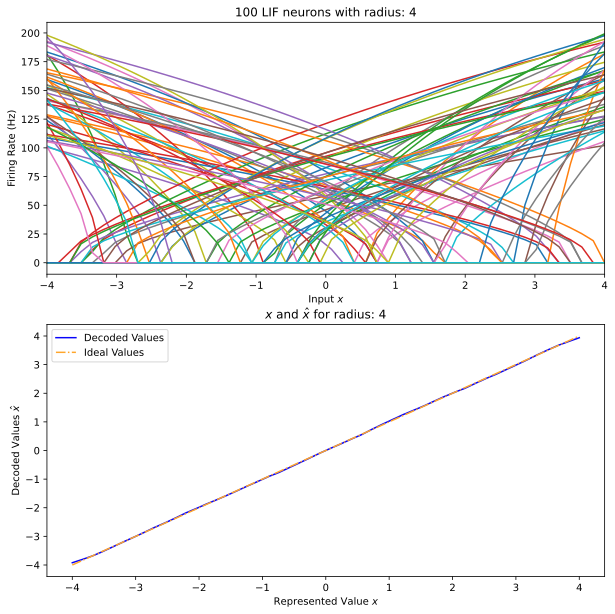

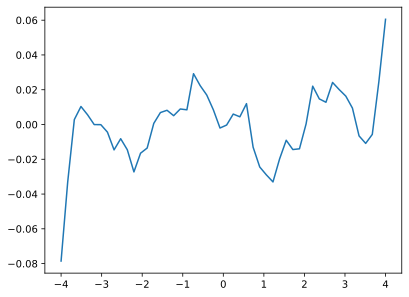

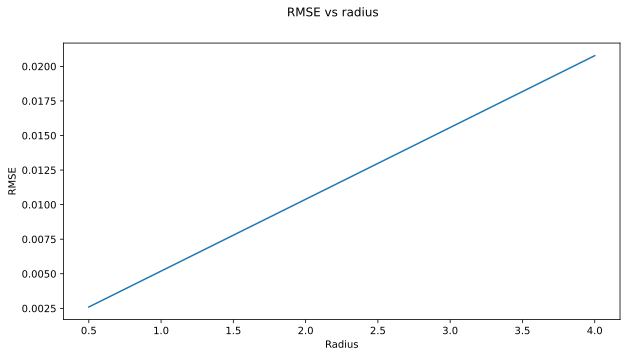

In [4]:
# Init Radii to be used

radii = [0.5, 1, 2, 4]
error = []
errors = []
e_rmse = []
for radius in radii:
    ensemble.radius = radius # Fetch radius for each ensemble
    
    simulation = nengo.Simulator(model) # Create simulation for each radius
    
    # Plot Tuning curves for LIF neuron ensemble
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
    ax1.set_title("100 LIF neurons with radius: " + str(radius))
    x,A = tuning_curves(ensemble, simulation)
    ax1.plot(x,A)
    ax1.set_xlabel("Input $x$")
    ax1.set_ylabel("Firing Rate (Hz)")
    ax1.set_xlim([-radius, radius])
    
    # # Calculate decoded values as well as ideal values with evaluation points
    # # Plot them right after they are calculated
    eval_points, ideal, decoded = eval_point_decoding(connection, simulation,x)
    error = ideal-decoded
    
    ax2.set_title("$x$ and $\hat{x}$ for radius: " + str(radius))
    ax2.plot(eval_points, decoded, label="Decoded Values", color="xkcd:Primary Blue")
    ax2.plot(eval_points, ideal, label="Ideal Values", color="xkcd:mango", linestyle="dashdot")
    ax2.set_xlabel("Represented Value $x$")
    ax2.set_ylabel("Decoded Values $\hat x$")
    ax2.legend()
    
    # Calculate RMSE for the ideal and decoded values
    rmse_err = calc_rmse(ideal, decoded)

    # Append related reults or the RMSE to be plotted and printed later
    ob = {"rmse": rmse_err, "radius": radius}
    errors.append(ob)
    e_rmse.append(rmse_err)
    plt.figure()
    plt.plot(eval_points,error)

# Print RMSE block for each of the radii's errors
for error in errors:
    print("RMSE for 100 Neurons with Radius" + str(error["radius"]) + "------")
    print(error["rmse"])
    print("--------------------------------------------")

plt.figure(figsize=(10,5))
plt.suptitle("RMSE vs radius")
plt.plot(radii, e_rmse)
plt.xlabel("Radius")
plt.ylabel("RMSE")


**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

The RMSE vs radii evidently has a linear relationship. Hence we could estimate the equation using the RMSE values for each radii.

Let $E(r)$ be some linear function that follows the trend in the plot above. So then, using the basic straight line equation:

$$ E(r) = mr + b $$

where,

$$m => Slope, b => Intercept $$

Now $$(r_1, E_1) = (0.5,0.0021568295)$$ $$(r_2, E_2) = (4,0.0172546362)$$

So then,

$$m = \frac{E_2-E_1}{r_2-r_1} $$

$$b = \frac{r_2 * E_1- r_1 * E_2}{r_2-r_1} $$

which gives us,

$$E_{RMSE} = 0.0034506151143*r-4.29*10^{-11}  $$




In [5]:
# Helper calcs cause lol

r1, r2 = 0.5,4
E1,E2 = errors[0]["rmse"], errors[-1]["rmse"]

m = round((E2-E1) / (r2-r1),13)

b = round(((r2*E1) - (r1*E2)) / (r2-r1),13)

print("Slope = ",m)
print("Intercept = ",b)


Slope =  0.0051938279714
Intercept =  1.43e-11


**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE of 100 Neurons with tauRef =0.001------
0.0039841802
--------------------------------------------
RMSE of 100 Neurons with tauRef =0.002------
0.0044908479
--------------------------------------------
RMSE of 100 Neurons with tauRef =0.003------
0.0054449268
--------------------------------------------
RMSE of 100 Neurons with tauRef =0.004------
0.0069688444
--------------------------------------------
RMSE of 100 Neurons with tauRef =0.005------
0.0090571363
--------------------------------------------


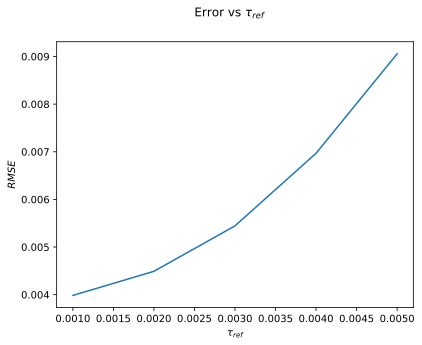

In [6]:
tau_refs = [0.001, 0.002, 0.003, 0.004, 0.005]
tau_rc = 0.02
dimensions = 1
encoders = [-1, 1]
errors = []
e_rs = []

for tau_ref in tau_refs:
    model = nengo.Network(label="1-Dim Ensemble", seed=seed)
    lif = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
    with model:
        ensemble = nengo.Ensemble(
            n_neurons=num_neurons,
            dimensions=dimensions,
            max_rates=nengo.dists.Uniform(100, 200),
            neuron_type=lif,
        )
        connection = nengo.Connection(ensemble, ensemble)

    simulation = nengo.Simulator(model)
    
    # Plotted tuning 

    # fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
    # ax1.set_title("100 LIF neurons with $\\tau_{ref}$: " + str(tau_ref))
    # ax1.plot(*tuning_curves(ensemble, simulation))
    # ax1.set_xlabel("Input $x$")
    # ax1.set_ylabel("Firing Rate (Hz)")
    # ax1.set_xlim([-1, 1])
   
    eval_points, ideal, decoded = eval_point_decoding(connection, simulation)
    
    # ax2.set_title("$x$ and $\hat{x}$ for $\\tau_{ref}$: " + str(tau_ref))
    # ax2.plot(eval_points, decoded, label="Decoded Values", color="xkcd:Primary Blue")
    # ax2.plot(eval_points, ideal, label="Ideal Values", color="xkcd:red", linestyle="dashed")
    # ax2.set_xlabel("Represented Value $x$")
    # ax2.set_ylabel("Decoded Values $\hat x$")
    # ax2.legend()
    rmse_err = calc_rmse(ideal, decoded)

    ob = {"rmse": rmse_err, "tau_ref": tau_ref}
    errors.append(ob)
    e_rs.append(rmse_err)

for error in errors:
    print("RMSE of 100 Neurons with tauRef =" + str(error["tau_ref"]) + "------")
    print(error["rmse"])
    print("--------------------------------------------")

plt.figure()
plt.suptitle("Error vs $\\tau_{ref}$")
plt.plot(tau_refs, e_rs)
plt.xlabel("$\\tau_{ref}$")
plt.ylabel("$RMSE$")
plt.show()


**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE for 100 neurons with $\tau_{RC}$0.01------
0.0050522458
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.025------
0.0043765738
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.05------
0.0041465894
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.075------
0.0040734881
--------------------------------------------
RMSE for 100 neurons with $\tau_{RC}$0.1------
0.0040398759
--------------------------------------------


Text(0, 0.5, '$RMSE$')

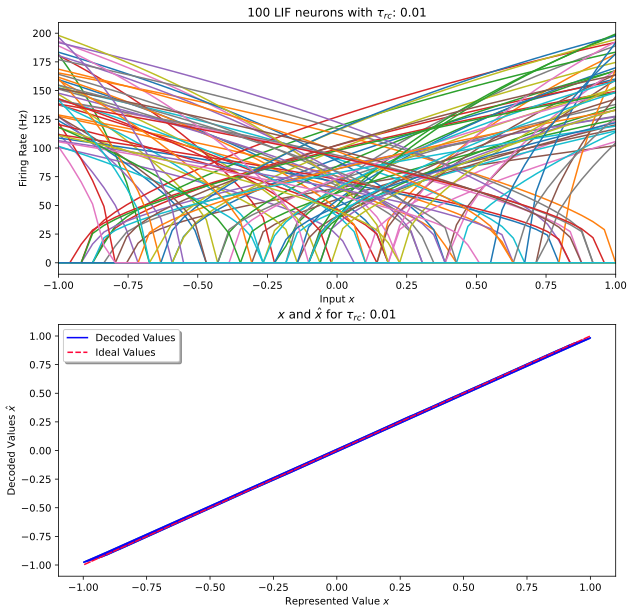

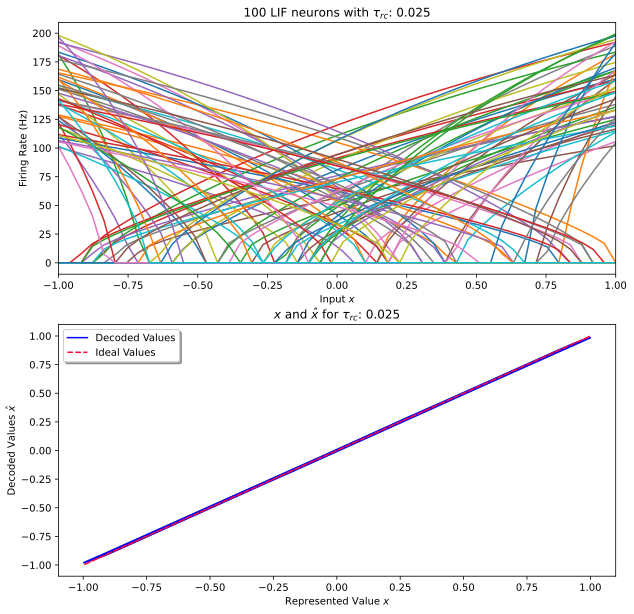

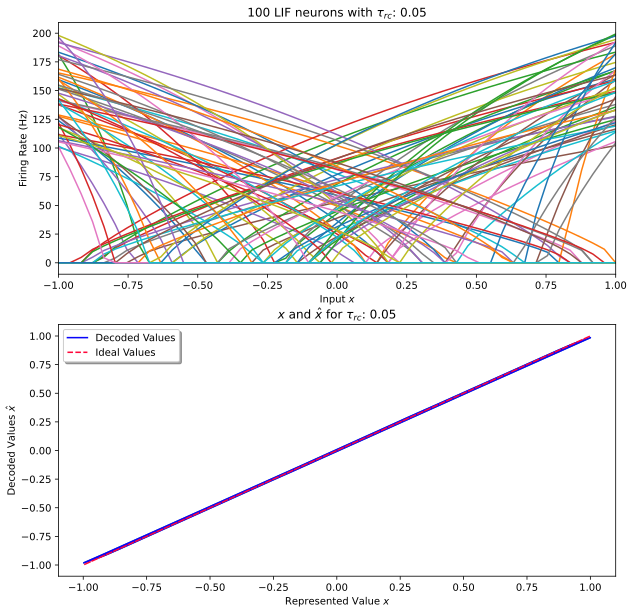

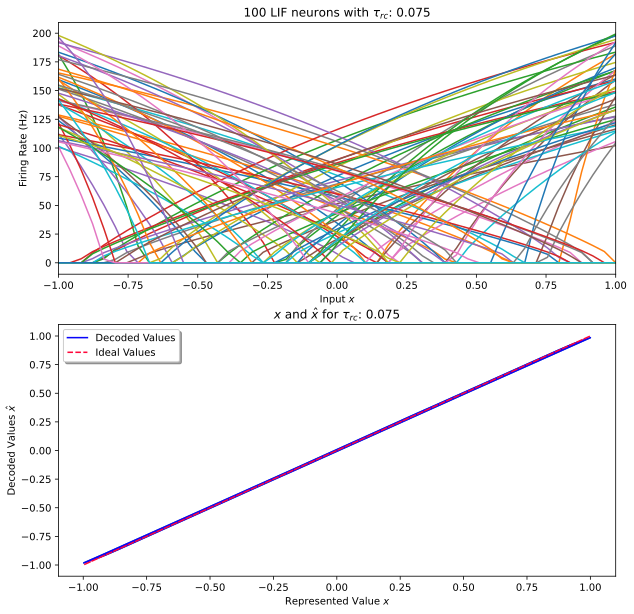

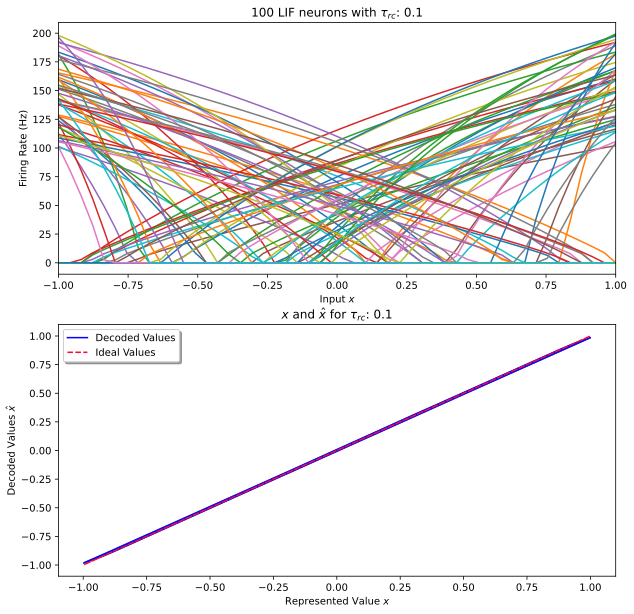

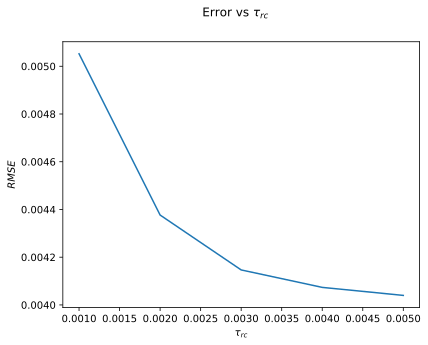

In [7]:
tau_rcs = [10 / 1000, 25 / 1000, 50 / 1000, 75 / 1000, 100 / 1000]
n = 100
tau_ref = 2 / 1000
dimensions = 1
encoders = [-1, 1]

errors = []
e_rs = []

for tau_rc in tau_rcs:
    model = nengo.Network(label="1-Dim Ensemble", seed=seed)
    lif = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
    with model:
        ens = nengo.Ensemble(
            n_neurons=n,
            dimensions=dimensions,
            max_rates=nengo.dists.Uniform(100, 200),
            neuron_type=lif,
        )
        connection = nengo.Connection(ens, ens)

    simulation = nengo.Simulator(model)

    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
    ax1.set_title("100 LIF neurons with $\\tau_{rc}$: " + str(tau_rc))
    ax1.plot(*tuning_curves(ens, simulation))
    ax1.set_xlabel("Input $x$")
    ax1.set_ylabel("Firing Rate (Hz)")
    ax1.set_xlim([-1, 1])
  
    eval_points, ideal, decoded = eval_point_decoding(connection, simulation)

    ax2.set_title("$x$ and $\hat{x}$ for $\\tau_{rc}$: " + str(tau_rc))
    ax2.plot(ideal, decoded)
    ax2.plot(eval_points, decoded, label="Decoded Values", color="xkcd:Primary Blue")
    ax2.plot(eval_points, ideal, label="Ideal Values", color="xkcd:neon red", linestyle="dashed")
    ax2.set_xlabel("Represented Value $x$")
    ax2.set_ylabel("Decoded Values $\hat x$")
    ax2.legend(shadow=True)
    rmse_err = calc_rmse(ideal, decoded)

    ob = {"rmse": rmse_err, "tau_rc": tau_rc}
    errors.append(ob)
    e_rs.append(rmse_err)

for error in errors:
    print("RMSE for 100 neurons with $\\tau_{RC}$" + str(error["tau_rc"]) + "------")
    print(error["rmse"])
    print("--------------------------------------------")

plt.figure()
plt.suptitle("Error vs $\\tau_{rc}$")
plt.plot(tau_refs, e_rs)
plt.xlabel("$\\tau_{rc}$")
plt.ylabel("$RMSE$")


**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

As $\tau_{ref}$ increases we can see that that the RMSE increases in what appears to be an exponential nature. This is likely due the fact that the refractory period is limiting the rate at which the neurons can spike so as we increase the period, we would expect to see an increase in information loss in the signal because the neurons can't fire at a rate at that preserves much of the input signal.

In the case of the membrane time constant $\tau_{rc}$  we can see that the RMSE decreases exponentially and decays as $\tau_{rc}$ increases. This is because at low values, neurons get excited very quickly and this can cause them to fire at incorrect times increasing noise in the neuron's output.

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

In [8]:
def identity(channel_function):
	global seed
	#ensemble parameters
	N=50
	dimensions=1
	tau_rc=0.02
	tau_ref=0.002
	noise=0.1
	T=0.5
	seed=seed

	lif_model=nengo.LIF(tau_rc=tau_rc,tau_ref=tau_ref)

	model=nengo.Network(label='Communication Channel')

	with model:
		# stimulus 1 for 0.1<t<0.4 and zero otherwise
		stimulus=nengo.Node(output=lambda t: 0+ 1.0*(0.1<t<0.4))

		#create ensembles
		ensemble_1=nengo.Ensemble(N,dimensions,
							intercepts=nengo.dists.Uniform(-1.0,1.0),
							max_rates=nengo.dists.Uniform(100,200),
							neuron_type=lif_model)
		ensemble_2=nengo.Ensemble(N,dimensions,
							intercepts=nengo.dists.Uniform(-1.0,1.0),
							max_rates=nengo.dists.Uniform(100,200),
							neuron_type=lif_model)

		#connect stimulus to ensemble_1
		stimulation=nengo.Connection(stimulus,ensemble_1)

		#create communication channel between ensemble 1 and 2
		channel=nengo.Connection(ensemble_1,ensemble_2, function=channel_function, #identity
							synapse=0.01,  #10ms postsynaptic filter
							solver=nengo.solvers.LstsqNoise(noise=noise))

		#probe the decoded values from the two ensembles
		probe_stim=nengo.Probe(stimulus)
		probe_ensemble_1=nengo.Probe(ensemble_1, synapse=0.01)
		probe_ensemble_2=nengo.Probe(ensemble_2, synapse=0.01)

	#run the model
	sim=nengo.Simulator(model,seed=seed)
	sim.run(T)

	#plot inputs and outputs
	fig=plt.figure(figsize=(10,10))
	ax=fig.add_subplot(221)
	ax.set_title("Step input $x(t)$")
	ax.plot(sim.trange(),sim.data[probe_stim],label='stimulus', color="xkcd:neon red")
	ax.set_xlabel('time (s)')
	ax.set_ylabel('output')
	# ax.set_ylim(0,1)
	ax.legend(shadow=True)
	ax=fig.add_subplot(222)
	ax.set_title("Decoded output from Ensemble 1")
	ax.plot(sim.trange(),sim.data[probe_ensemble_1],label='ensemble 1')
	ax.set_xlabel('time (s)')
	ax.set_ylabel('output')
	# ax.set_ylim(0,1)
	ax.legend(shadow=True)
	ax=fig.add_subplot(223)
	ax.set_title("Decoded output from Ensemble 2")
	ax.plot(sim.trange(),sim.data[probe_ensemble_2],label='ensemble 2')
	ax.set_xlabel('time (s)')
	ax.set_ylabel('output')
	# ax.set_ylim(0,1)
	ax.legend(shadow=True)
	plt.tight_layout(pad=0.5)
	plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

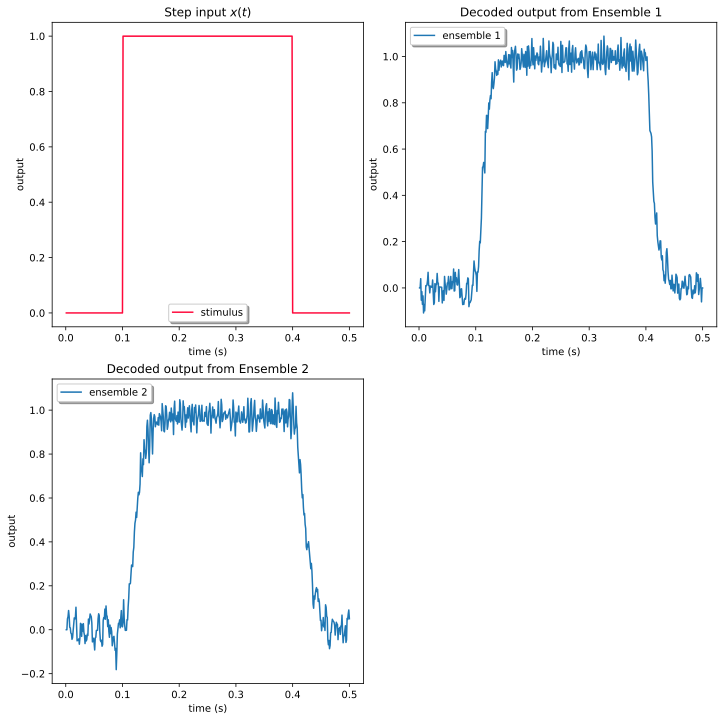

In [9]:
channel_function = lambda x : x
identity(channel_function=channel_function)


**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

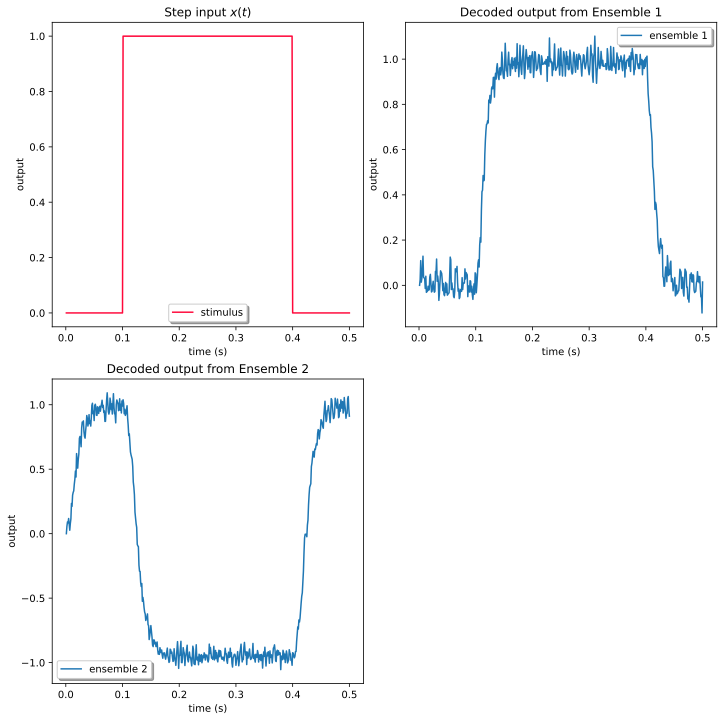

In [10]:
channel_function = lambda x: 1.0-2.0*x
identity(channel_function)

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

✍ \<YOUR SOLUTION HERE\>

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

In [11]:
def integrator(stim_function,neuron_type='spike', title="Neural Integrator"):
	global seed
	#ensemble parameters
	N=200
	dimensions=1
	tau_rc=0.02
	tau_ref=0.002
	tau_feedback=0.05
	tau_input=0.005
	noise=0.1
	T=1.5
	radius=1
	seed=seed

	if neuron_type == 'spike':
		lif_model=nengo.LIF(tau_rc=tau_rc,tau_ref=tau_ref)
	elif neuron_type == 'rate':
		lif_model=nengo.LIFRate(tau_rc=tau_rc,tau_ref=tau_ref)

	model=nengo.Network(label='Communication Channel')

	with model:
		stimulus=nengo.Node(output=stim_function)

		integrator=nengo.Ensemble(N,dimensions,
							radius=radius,                                  
							intercepts=nengo.dists.Uniform(-1,1),
							max_rates=nengo.dists.Uniform(100,200),
							neuron_type=lif_model)

		#define feedforward transformation <=> transform=tau
		def feedforward(u):
			return tau_feedback*u

		stimulation=nengo.Connection(stimulus,integrator,
							function=feedforward,
							#transform=tau_feedback,
							synapse=tau_input)

		#define recurrent transformation
		def recurrent(x):
			return 1.0*x

		#create recurrent connection
		channel=nengo.Connection(integrator,integrator,
							function=recurrent,
							synapse=tau_feedback,  
							solver=nengo.solvers.LstsqNoise(noise=noise))

		#probes
		probe_stimulus=nengo.Probe(stimulus)
		probe_integrator=nengo.Probe(integrator,synapse=tau_feedback)

	#run the model
	sim=nengo.Simulator(model,seed=seed)
	sim.run(T)

	#calculated expected (ideal) using scipy.integrate
	ideal=[integrate.quad(stim_function,0,T)[0] 
		for T in sim.trange()]

	#plot input and integrator value
	fig=plt.figure(figsize=(20,10))
	ax=fig.add_subplot(111)
	ax.set_title(title)
	ax.plot(sim.trange(),sim.data[probe_stimulus],label='stimulus', linestyle="dashed", color="xkcd:neon red")
	ax.plot(sim.trange(),sim.data[probe_integrator],label='integrator')
	ax.plot(sim.trange(),ideal,label='ideal', linestyle="dashdot", color="xkcd:mango")
	ax.set_xlabel('time (s)')
	# ax.set_ylabel('value')
	# ax.set_ylim(0,1)
	ax.legend(shadow=True)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_7987/868602790.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


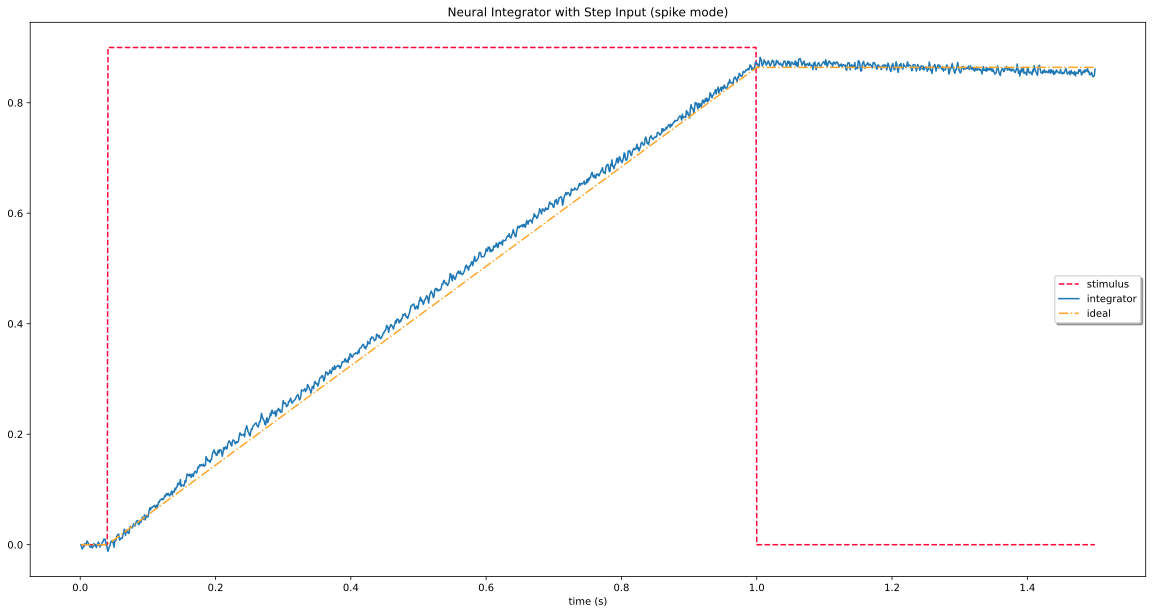

In [12]:
stimuli_func = lambda t: 0.9*(0.04<t<1.0)
integrator(stimuli_func,neuron_type="spike", title="Neural Integrator with Step Input (spike mode)")

**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

The expected result (actually a close numerical approximation of it) is plotted in red. This value corresponds to finding the integral of the differential equation describing the value stored in the integrator ensemble over all time. The general form of this differential equation can be written using control theory:

$$\dot{x} = Ax + Bu$$

where $x$ is the represented state variable, $u$ is the input, $A$ is the feedback matrix, and $B$ is the input matrix. In this case, $x$ and $u$ are one-dimensional, and the integrator merely accumulates the value of its input ($A=0$ as in the eye control example in Lecture 2), so this equation reduces to

$$\dot{x} = u =
    \begin{cases}
        0.9 \quad &0.04<t<1.0 \\ 
        0 &otherwise 
    \end{cases}
$$

Integrating to find x(t), we get

$$x(t) = \int_0^T u dt = 
    \begin{cases}
        0 \quad &T<0.04 \\ 
        \int_{0.04}^{T} 0.9 dt = 0.9(T-0.04) &0.04<T<1.0 \\
        \int_{0.04}^{1.0} 0.9 dt = 0.864 &T>1.0
    \end{cases}
$$

The simulation results exhibit a slight overestimation of this value due to the differences between the synaptic time constant of the feedback connection, $\tau_{feedback}$, and the input connection, $\tau_{input}$. When $\tau_{input}$<$\tau_{feedback}$, as above, the stimulus is delivered on a shorter timescale than the recurrent input, leading to rapid accumulation and overestimation during the ramp. Once input is removed, the value stored in the integrator steadily moves towards $ideal=0.864$ (or to the nearest attractor in the neuron space). When the values are equal, the estimation during input is much more accurate; and when $\tau_{input}$>$\tau_{feedback}$, the large degree of smoothing causes less input to be delivered to the integrator than is 'expected' by the reccurent connection, causing underestimation.

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_7987/868602790.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


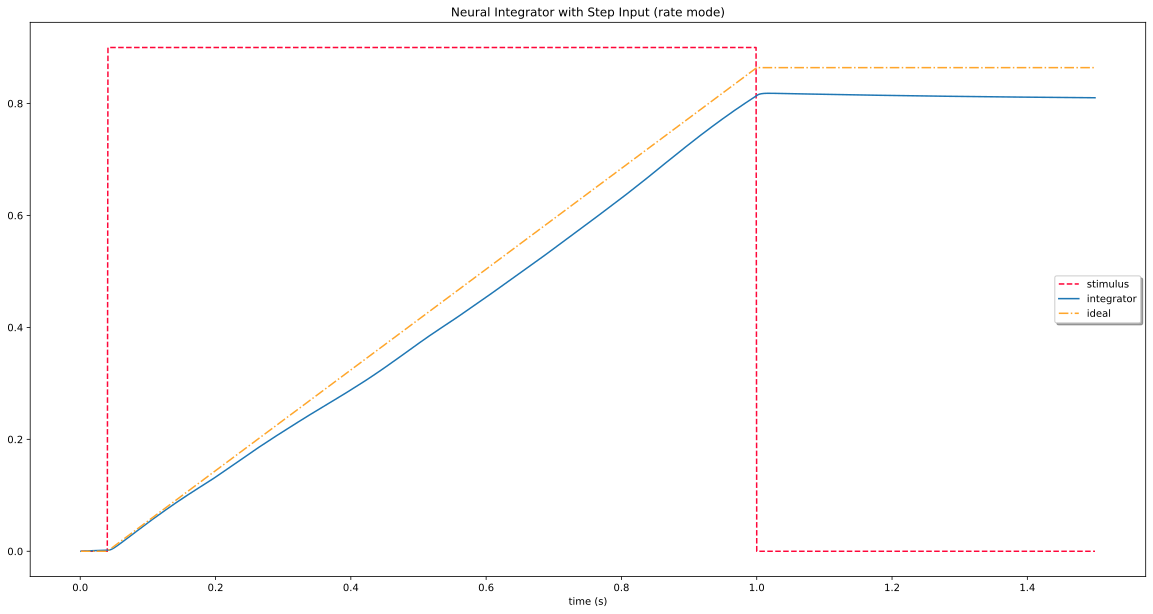

In [13]:
integrator(stimuli_func,neuron_type="rate", title="Neural Integrator with Step Input (rate mode)")

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

there is some deviation as compared to part b only because there might be some noise conflicts with the rate estimation of the input signal. where as the noise was compensated for in the spike estimation of the input signal

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_7987/868602790.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


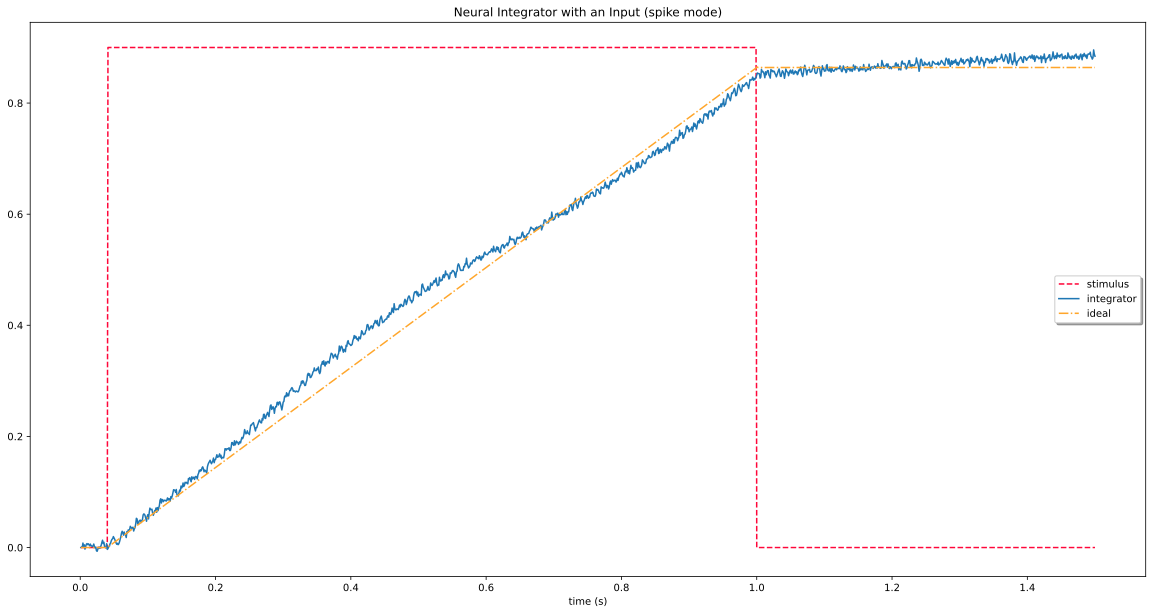

In [14]:
stim_func = lambda t: 0.9*(0.04<t<0.16)
integrator(stimuli_func,neuron_type="spike", title="Neural Integrator with an Input (spike mode)")

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

✍ \<YOUR SOLUTION HERE\>

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/var/folders/vx/4n9y5hq95dj5b30w8b75ms1h0000gn/T/ipykernel_7987/868602790.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ideal=[integrate.quad(stim_function,0,T)[0]


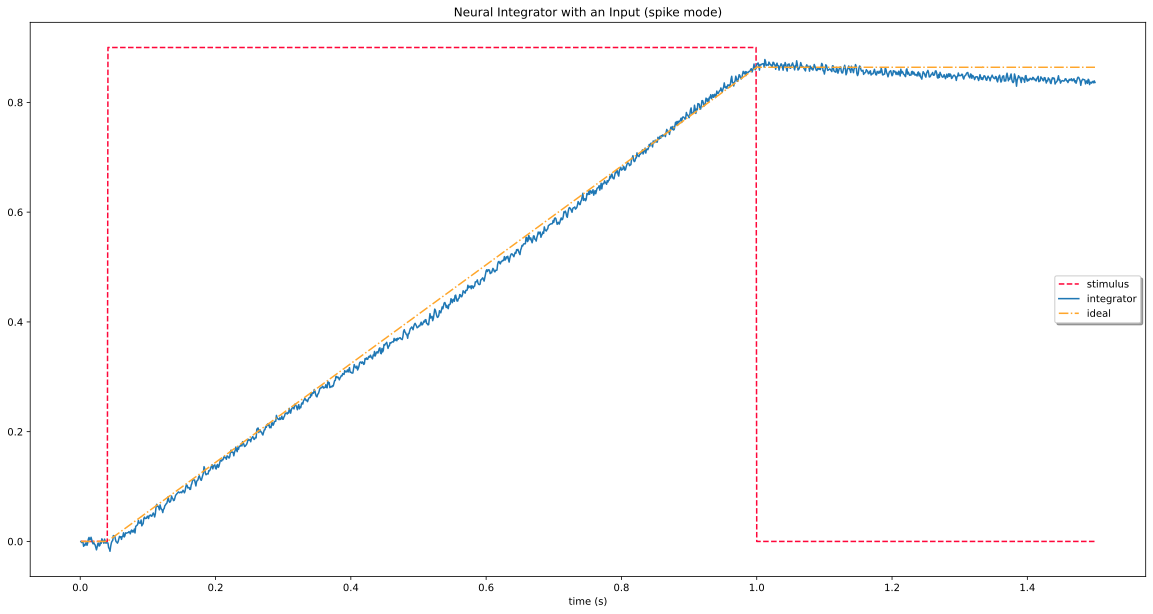

In [15]:
stim_func = lambda t: 2.0*t*(0.0<=t<=0.45)
integrator(stimuli_func,neuron_type="spike", title="Neural Integrator with an Input (spike mode)")

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

✍ \<YOUR SOLUTION HERE\>

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

In [16]:
# ✍ <YOUR SOLUTION HERE>

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

✍ \<YOUR SOLUTION HERE\>

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

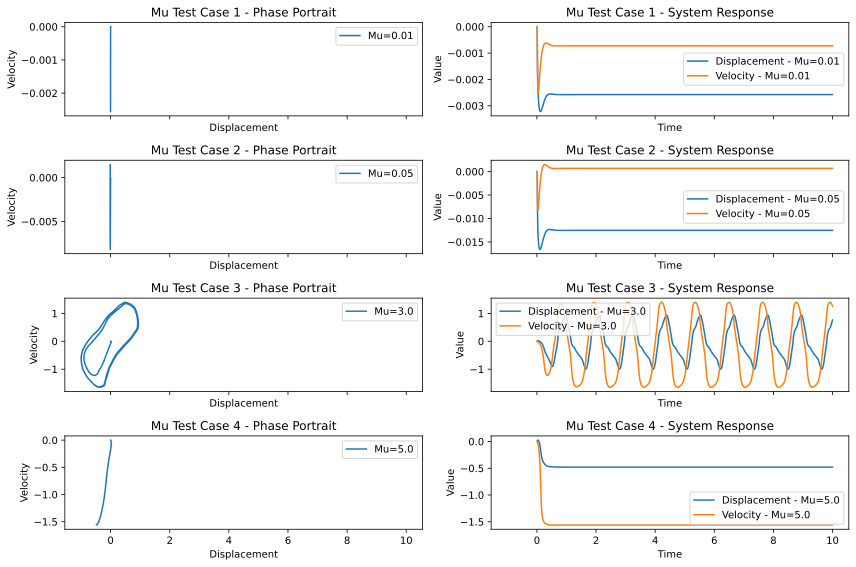

In [17]:

# Define the Van der Pol oscillator equations
def vanderpol(t, x, μ):
    dxdt = x[1]
    dydt = μ * (1 - x[0] ** 2) * x[1] - x[0]
    return [dxdt, dydt]

def run_mu_experiment(mu, sim_time=10.0, n_neurons=100):
    # Nengo model
    model = nengo.Network()
    with model:
        # Define the ensemble with 2 dimensions for x and y
        ensemble = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.LIFRate())

        # Create a function node to represent the Van der Pol equations
        vanderpol_node = nengo.Node(lambda t, x: vanderpol(t, x, mu), size_in=2, size_out=2, label="Van der Pol")
        nengo.Connection(ensemble, vanderpol_node, synapse=None)
        nengo.Connection(vanderpol_node, ensemble, synapse=0.1)  # Feedback connection with fixed synapse

        # Create probes to record data
        ensemble_probe = nengo.Probe(ensemble, synapse=0.01)

    # Simulate the model with larger time step
    with nengo.Simulator(model, dt=0.01) as sim:
        sim.run(sim_time)

    return sim.trange(), sim.data[ensemble_probe]

# Define different values for mu
mu_values = [0.01, 0.05, 3.0, 5.0]

# Create subplots for each test case
fig, axes = plt.subplots(len(mu_values), 2, figsize=(12, 8), sharex=True)

for i, mu in enumerate(mu_values):
    # Run simulation for the current mu value
    time, result = run_mu_experiment(mu, n_neurons=50)  # Reduced number of neurons

    # Plot phase portrait
    axes[i, 0].plot(result[:, 0], result[:, 1], label=f'Mu={mu}')
    axes[i, 0].set_title(f'Mu Test Case {i + 1} - Phase Portrait')
    axes[i, 0].set_xlabel('Displacement')
    axes[i, 0].set_ylabel('Velocity')
    axes[i, 0].legend()

    # Plot system response outputs
    axes[i, 1].plot(time, result[:, 0], label=f'Displacement - Mu={mu}')
    axes[i, 1].plot(time, result[:, 1], label=f'Velocity - Mu={mu}')
    axes[i, 1].set_title(f'Mu Test Case {i + 1} - System Response')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()
